# TASK 1

## Problem Statement

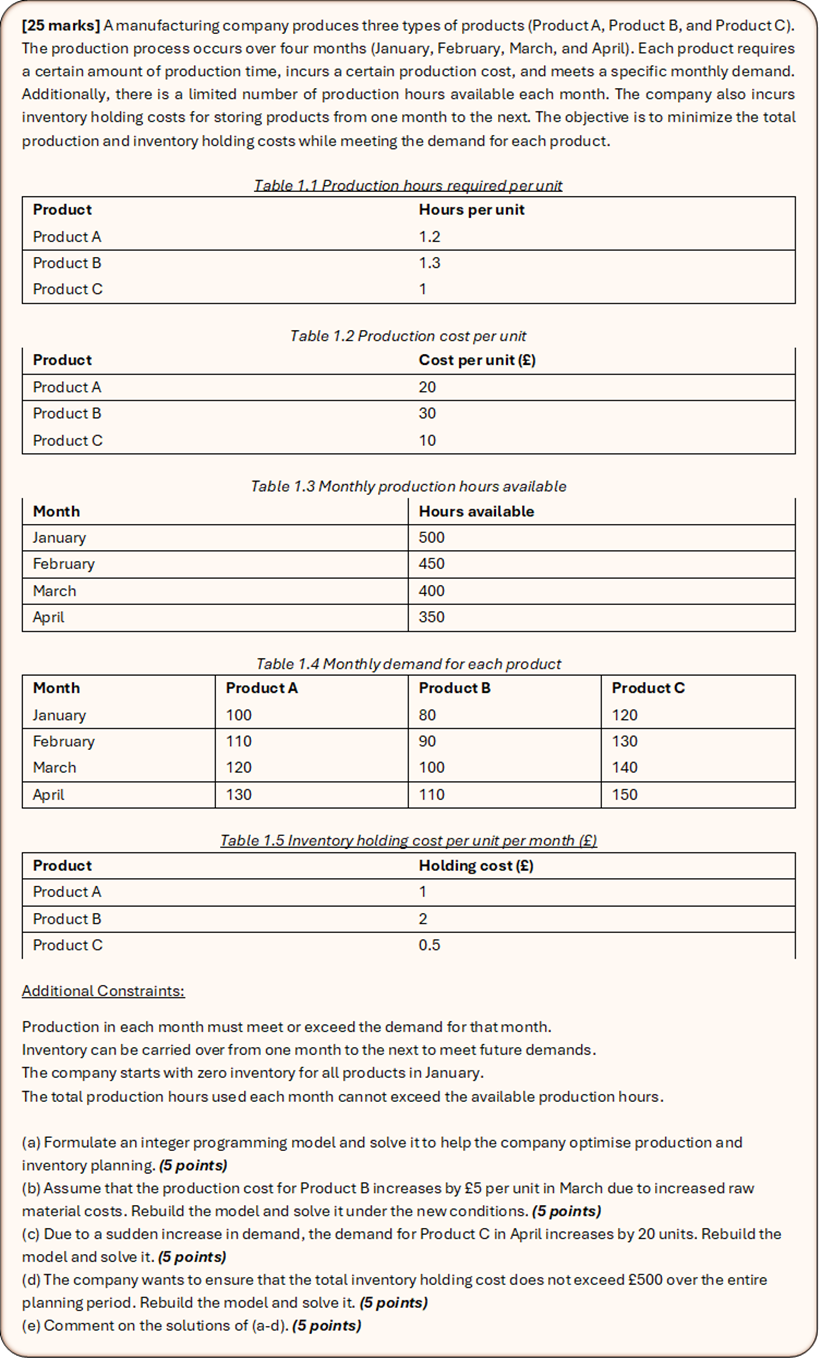

## Part (a)

In [20]:
# SETTING THE PYTHON ENVIRONMENT

# Intall and Import Package/Library
!pip install pulp
import pulp

In [21]:
# DEFINE PROBLEM PARAMETERS

# Define products and months
products = ['A', 'B', 'C']
months = ['Jan', 'Feb', 'Mar', 'Apr']

# Production time (hours per unit)
T = {'A': 1.2, 'B': 1.3, 'C': 1}

# Production cost per unit
C = {'A': 20, 'B': 30, 'C': 10}

# Inventory holding cost per unit per month
H = {'A': 1, 'B': 2, 'C': 0.5}

# Monthly production hours available
M = {'Jan': 500, 'Feb': 450, 'Mar': 400, 'Apr': 350}

# Monthly demand for each product
D = {
    'Jan': {'A': 100, 'B': 80, 'C': 120},
    'Feb': {'A': 110, 'B': 90, 'C': 130},
    'Mar': {'A': 120, 'B': 100, 'C': 140},
    'Apr': {'A': 130, 'B': 110, 'C': 150}
}

In [22]:
# INTEGER PROGRAMMING MODEL

# Create the LP problem
model = pulp.LpProblem("Production_Inventory_Optimization", pulp.LpMinimize)

# Decision variables
P = pulp.LpVariable.dicts("Production", [(i, j) for i in products for j in months], lowBound=0, cat='Integer')
I = pulp.LpVariable.dicts("Inventory", [(i, j) for i in products for j in months], lowBound=0, cat='Integer')

# Objective function: Minimize production and inventory costs
model += pulp.lpSum(
    C[i] * P[(i, j)] + H[i] * I[(i, j)]
    for i in products for j in months
)

# Constraints

# 1. Inventory balance constraints
for i in products:
    for idx, j in enumerate(months):
        if idx == 0:  # For January, initial inventory is zero
            model += P[(i, j)] - D[j][i] == I[(i, j)]
        else:  # For other months
            prev_month = months[idx - 1]
            model += I[(i, prev_month)] + P[(i, j)] - D[j][i] == I[(i, j)]

# 2. Production time constraints
for j in months:
    model += pulp.lpSum(T[i] * P[(i, j)] for i in products) <= M[j]

# Solve the model
model.solve()

1

In [23]:
# RESULTS

# Output the results in tabular form
import pandas as pd
for i in products:
    product_output = []
    for j in months:
        product_output.append({
            'Month': j,
            'Produced': P[(i, j)].varValue,
            'Inventory': I[(i, j)].varValue
        })
    product_df = pd.DataFrame(product_output)
    print(f"\nProduct {i} Production and Inventory Plan:\n")
    print(product_df)

# Display total cost
print("\nTotal Cost:", pulp.value(model.objective))


Product A Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan     100.0        0.0
1   Feb     110.0        0.0
2   Mar     120.0        0.0
3   Apr     130.0        0.0

Product B Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan      80.0        0.0
1   Feb      90.0        0.0
2   Mar     100.0        0.0
3   Apr     110.0        0.0

Product C Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan     162.0       42.0
1   Feb     201.0      113.0
2   Mar     126.0       99.0
3   Apr      51.0        0.0

Total Cost: 26127.0


## Part (b)

In [13]:
# SETTING THE PYTHON ENVIRONMENT

# Intall and Import Package/Library
!pip install pulp
import pulp

In [17]:
# DEFINE PROBLEM PARAMETERS

# Define products and months
products = ['A', 'B', 'C']
months = ['Jan', 'Feb', 'Mar', 'Apr']

# Production time (hours per unit)
T = {'A': 1.2, 'B': 1.3, 'C': 1}

# Production cost per unit with month-specific adjustments
C = {
    'A': {'Jan': 20, 'Feb': 20, 'Mar': 20, 'Apr': 20},
    'B': {'Jan': 30, 'Feb': 30, 'Mar': 35, 'Apr': 30},  # Adjusted for March
    'C': {'Jan': 10, 'Feb': 10, 'Mar': 10, 'Apr': 10}
}

# Inventory holding cost per unit per month
H = {'A': 1, 'B': 2, 'C': 0.5}

# Monthly production hours available
M = {'Jan': 500, 'Feb': 450, 'Mar': 400, 'Apr': 350}

# Monthly demand for each product
D = {
    'Jan': {'A': 100, 'B': 80, 'C': 120},
    'Feb': {'A': 110, 'B': 90, 'C': 130},
    'Mar': {'A': 120, 'B': 100, 'C': 140},
    'Apr': {'A': 130, 'B': 110, 'C': 150}
}

In [18]:
# INTEGER PROGRAMMING MODEL

# Create the LP problem
model = pulp.LpProblem("Production_Inventory_Optimization", pulp.LpMinimize)

# Decision variables
P = pulp.LpVariable.dicts("Production", [(i, j) for i in products for j in months], lowBound=0, cat='Integer')
I = pulp.LpVariable.dicts("Inventory", [(i, j) for i in products for j in months], lowBound=0, cat='Integer')

# Objective function: Minimize production and inventory costs
model += pulp.lpSum(
    C[i][j] * P[(i, j)] + H[i] * I[(i, j)]
    for i in products for j in months
)

# Constraints

# 1. Inventory balance constraints
for i in products:
    for idx, j in enumerate(months):
        if idx == 0:  # For January, initial inventory is zero
            model += P[(i, j)] - D[j][i] == I[(i, j)]
        else:  # For other months
            prev_month = months[idx - 1]
            model += I[(i, prev_month)] + P[(i, j)] - D[j][i] == I[(i, j)]

# 2. Production time constraints
for j in months:
    model += pulp.lpSum(T[i] * P[(i, j)] for i in products) <= M[j]

# Solve the model
model.solve()

1

In [19]:
# RESULTS

# Output the results in tabular form
import pandas as pd
for i in products:
    product_output = []
    for j in months:
        product_output.append({
            'Month': j,
            'Produced': P[(i, j)].varValue,
            'Inventory': I[(i, j)].varValue
        })
    product_df = pd.DataFrame(product_output)
    print(f"\nProduct {i} Production and Inventory Plan:\n")
    print(product_df)

# Display total cost
print("\nTotal Cost:", pulp.value(model.objective))


Product A Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan     100.0        0.0
1   Feb     110.0        0.0
2   Mar     120.0        0.0
3   Apr     130.0        0.0

Product B Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan      80.0        0.0
1   Feb     190.0      100.0
2   Mar       0.0        0.0
3   Apr     110.0        0.0

Product C Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan     179.0       59.0
1   Feb      71.0        0.0
2   Mar     239.0       99.0
3   Apr      51.0        0.0

Total Cost: 26279.0


## Part (c)

In [24]:
# SETTING THE PYTHON ENVIRONMENT

# Intall and Import Package/Library
!pip install pulp
import pulp

In [25]:
# DEFINE PROBLEM PARAMETERS

# Define products and months
products = ['A', 'B', 'C']
months = ['Jan', 'Feb', 'Mar', 'Apr']

# Production time (hours per unit)
T = {'A': 1.2, 'B': 1.3, 'C': 1}

# Production cost per unit
C = {'A': 20, 'B': 30, 'C': 10}

# Inventory holding cost per unit per month
H = {'A': 1, 'B': 2, 'C': 0.5}

# Monthly production hours available
M = {'Jan': 500, 'Feb': 450, 'Mar': 400, 'Apr': 350}

# Monthly demand for each product
D = {
    'Jan': {'A': 100, 'B': 80, 'C': 120},
    'Feb': {'A': 110, 'B': 90, 'C': 130},
    'Mar': {'A': 120, 'B': 100, 'C': 140},
    'Apr': {'A': 130, 'B': 110, 'C': 170}  # Increased demand for Product C in April
}

In [26]:
# INTEGER PROGRAMMING MODEL

# Create the LP problem
model = pulp.LpProblem("Production_Inventory_Optimization", pulp.LpMinimize)

# Decision variables
P = pulp.LpVariable.dicts("Production", [(i, j) for i in products for j in months], lowBound=0, cat='Integer')
I = pulp.LpVariable.dicts("Inventory", [(i, j) for i in products for j in months], lowBound=0, cat='Integer')

# Objective function: Minimize production and inventory costs
model += pulp.lpSum(
    C[i] * P[(i, j)] + H[i] * I[(i, j)]
    for i in products for j in months
)

# Constraints

# 1. Inventory balance constraints
for i in products:
    for idx, j in enumerate(months):
        if idx == 0:  # For January, initial inventory is zero
            model += P[(i, j)] - D[j][i] == I[(i, j)]
        else:  # For other months
            prev_month = months[idx - 1]
            model += I[(i, prev_month)] + P[(i, j)] - D[j][i] == I[(i, j)]

# 2. Production time constraints
for j in months:
    model += pulp.lpSum(T[i] * P[(i, j)] for i in products) <= M[j]

# Solve the model
model.solve()

1

In [27]:
# RESULTS

# Output the results in tabular form
import pandas as pd
for i in products:
    product_output = []
    for j in months:
        product_output.append({
            'Month': j,
            'Produced': P[(i, j)].varValue,
            'Inventory': I[(i, j)].varValue
        })
    product_df = pd.DataFrame(product_output)
    print(f"\nProduct {i} Production and Inventory Plan:\n")
    print(product_df)

# Display total cost
print("\nTotal Cost:", pulp.value(model.objective))


Product A Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan     100.0        0.0
1   Feb     110.0        0.0
2   Mar     120.0        0.0
3   Apr     130.0        0.0

Product B Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan      80.0        0.0
1   Feb      90.0        0.0
2   Mar     100.0        0.0
3   Apr     110.0        0.0

Product C Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan     182.0       62.0
1   Feb     201.0      133.0
2   Mar     126.0      119.0
3   Apr      51.0        0.0

Total Cost: 26357.0


## Part (d)

In [28]:
# SETTING THE PYTHON ENVIRONMENT

# Intall and Import Package/Library
!pip install pulp
import pulp

In [29]:
# DEFINE PROBLEM PARAMETERS

# Define products and months
products = ['A', 'B', 'C']
months = ['Jan', 'Feb', 'Mar', 'Apr']

# Production time (hours per unit)
T = {'A': 1.2, 'B': 1.3, 'C': 1}

# Production cost per unit
C = {'A': 20, 'B': 30, 'C': 10}

# Inventory holding cost per unit per month
H = {'A': 1, 'B': 2, 'C': 0.5}

# Monthly production hours available
M = {'Jan': 500, 'Feb': 450, 'Mar': 400, 'Apr': 350}

# Monthly demand for each product
D = {
    'Jan': {'A': 100, 'B': 80, 'C': 120},
    'Feb': {'A': 110, 'B': 90, 'C': 130},
    'Mar': {'A': 120, 'B': 100, 'C': 140},
    'Apr': {'A': 130, 'B': 110, 'C': 150}
}

In [30]:
# INTEGER PROGRAMMING MODEL

# Create the LP problem
model = pulp.LpProblem("Production_Inventory_Optimization", pulp.LpMinimize)

# Decision variables
P = pulp.LpVariable.dicts("Production", [(i, j) for i in products for j in months], lowBound=0, cat='Integer')
I = pulp.LpVariable.dicts("Inventory", [(i, j) for i in products for j in months], lowBound=0, cat='Integer')

# Objective function: Minimize production and inventory costs
model += pulp.lpSum(
    C[i] * P[(i, j)] + H[i] * I[(i, j)]
    for i in products for j in months
)

# Constraints

# 1. Inventory balance constraints
for i in products:
    for idx, j in enumerate(months):
        if idx == 0:  # For January, initial inventory is zero
            model += P[(i, j)] - D[j][i] == I[(i, j)]
        else:  # For other months
            prev_month = months[idx - 1]
            model += I[(i, prev_month)] + P[(i, j)] - D[j][i] == I[(i, j)]

# 2. Production time constraints
for j in months:
    model += pulp.lpSum(T[i] * P[(i, j)] for i in products) <= M[j]

# 3. Total inventory holding cost constraint
model += pulp.lpSum(H[i] * I[(i, j)] for i in products for j in months) <= 500

# Solve the model
model.solve()

1

In [31]:
# RESULTS

# Output the results in tabular form
import pandas as pd
for i in products:
    product_output = []
    for j in months:
        product_output.append({
            'Month': j,
            'Produced': P[(i, j)].varValue,
            'Inventory': I[(i, j)].varValue
        })
    product_df = pd.DataFrame(product_output)
    print(f"\nProduct {i} Production and Inventory Plan:\n")
    print(product_df)

# Display total cost
print("\nTotal Cost:", pulp.value(model.objective))

# Display total inventory holding cost
total_inventory_holding_cost = sum(H[i] * I[(i, j)].varValue for i in products for j in months)
print("\nTotal Inventory Holding Cost:", total_inventory_holding_cost)


Product A Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan     100.0        0.0
1   Feb     110.0        0.0
2   Mar     120.0        0.0
3   Apr     130.0        0.0

Product B Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan      80.0        0.0
1   Feb      90.0        0.0
2   Mar     100.0        0.0
3   Apr     110.0        0.0

Product C Production and Inventory Plan:

  Month  Produced  Inventory
0   Jan     162.0       42.0
1   Feb     201.0      113.0
2   Mar     126.0       99.0
3   Apr      51.0        0.0

Total Cost: 26127.0

Total Inventory Holding Cost: 127.0
